In [7]:
library(ggplot2)
library(dplyr)
library(gplots)
library(pvclust)
library(reshape2)
library(umap)
library(ggExtra) 
library(pals)
library(RColorBrewer)
library(ComplexHeatmap)
library(circlize)
library(heatmap.plus)

In [8]:
filtered <- read.table("../20230101_QC/final_summary_anno3.txt",header=T,sep="\t")
variant_list <- read.table("../variant_annotation/780_variant_annotation_COUPTF2_TBR1_DLX1_CBH.csv",header=T,sep=",",row.names=1)
filtered$Punch<-as.character(filtered$Punch)
filtered$Note<-as.character(filtered$Note)
mosaic_filtered <- filtered[filtered$Mosaic_shared_btw_WGS_Amp==1,] #Use 269 variants. assign this to mosaic_filtered
shared_variant_list<-variant_list[variant_list$sample_number_presented>1,]
shared_mosaic_filtered<-mosaic_filtered[mosaic_filtered$CHROM.POS.REF.ALT %in% rownames(shared_variant_list),]

# Fig3 Var x Sample heatmap 

In [9]:
melt_mtcars<-shared_mosaic_filtered[,c("ID", "MAF", "CHROM.POS.REF.ALT","Cell_Type","Organ",'Region','Punch','Sort_main','Hemisphere')]
melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('TBR1','DLX1','COUPTF2'),]
melt_mtcars<-melt_mtcars[melt_mtcars$Sort_main %in% c('1'),]
melt_mtcars<-melt_mtcars[melt_mtcars$Organ %in% c('CTX'),]
melt_mtcars$MAF <- sqrt(melt_mtcars$MAF)

In [10]:
melt_mtcars<-na.omit(melt_mtcars)

In [11]:
length(unique(melt_mtcars$CHROM.POS.REF.ALT))

[1] 186

In [12]:
casted_MAF_VarBySample <- dcast(melt_mtcars, ID+Hemisphere+Region+Organ+Cell_Type~CHROM.POS.REF.ALT, value.var = "MAF", rm.na=T)
rownames(casted_MAF_VarBySample) <- casted_MAF_VarBySample$ID
casted_MAF_VarBySample2 <- casted_MAF_VarBySample[,-1]
nrow(casted_MAF_VarBySample2)
unique(casted_MAF_VarBySample2$Hemisphere)
unique(casted_MAF_VarBySample2$Organ)
unique(casted_MAF_VarBySample2$Region)
unique(casted_MAF_VarBySample2$Cell_Type)

[1] 45

[1] "L" "R"

[1] "CTX"

[1] "CC" "EC" "F"  "I"  "mO" "O"  "P"  "T"

[1] "COUPTF2" "DLX1"    "TBR1"

In [13]:
rownames(casted_MAF_VarBySample2)

[1] "7669_L_CC_2_COUPTF2"  "7669_L_CC_2_DLX1"     "7669_L_EC_COUPTF2"   
 [4] "7669_L_EC_DLX1"       "7669_L_F_1_COUPTF2"   "7669_L_F_1_DLX1"     
 [7] "7669_L_F_1_TBR1"      "7669_L_I_1_COUPTF2"   "7669_L_I_1_DLX1"     
[10] "7669_L_I_1_TBR1"      "7669_L_mO_COUPTF2"    "7669_L_mO_DLX1"      
[13] "7669_L_O_1_COUPTF2"   "7669_L_O_1_DLX1"      "7669_L_O_1_TBR1"     
[16] "7669_L_P_1_COUPTF2"   "7669_L_P_1_DLX1"      "7669_L_P_1_TBR1"     
[19] "7669_L_T_1_COUPTF2"   "7669_L_T_1_DLX1"      "7669_L_T_1_TBR1"     
[22] "7669_R_CC_Mid_TBR1"   "7669_R_CCMid_COUPTF2" "7669_R_CCMid_DLX1"   
[25] "7669_R_EC_COUPTF2"    "7669_R_EC_DLX1"       "7669_R_EC_TBR1"      
[28] "7669_R_F_1_COUPTF2"   "7669_R_F_1_DLX1"      "7669_R_F_1_TBR1"     
[31] "7669_R_I_1_COUPTF2"   "7669_R_I_1_DLX1"      "7669_R_I_1_TBR1"     
[34] "7669_R_mO_COUPTF2"    "7669_R_mO_DLX1"       "7669_R_mO_TBR1"      
[37] "7669_R_O_1_COUPTF2"   "7669_R_O_1_DLX1"      "7669_R_O_1_TBR1"     
[40] "7669_R_P_1_COUPTF2"   "7669_R_P_1_DLX1"      "7669_R_P_1_TBR1"     
[43] "7669_R_T_1_COUPTF2"   "7669_R_T_1_DLX1"      "7669_R_T_1_TBR1"

In [14]:
Normalized_casted_MAF_VarBySample2<-t(na.omit(t(casted_MAF_VarBySample2[,-1:-4])))

In [21]:
set.seed(123)
res.pv <- pvclust(t(Normalized_casted_MAF_VarBySample2), method.dist="manhattan", method.hclust="complete", nboot = 10000,  parallel=TRUE)

Creating a temporary cluster...done:
socket cluster with 27 nodes on host ‘localhost’
Multiscale bootstrap... Done.


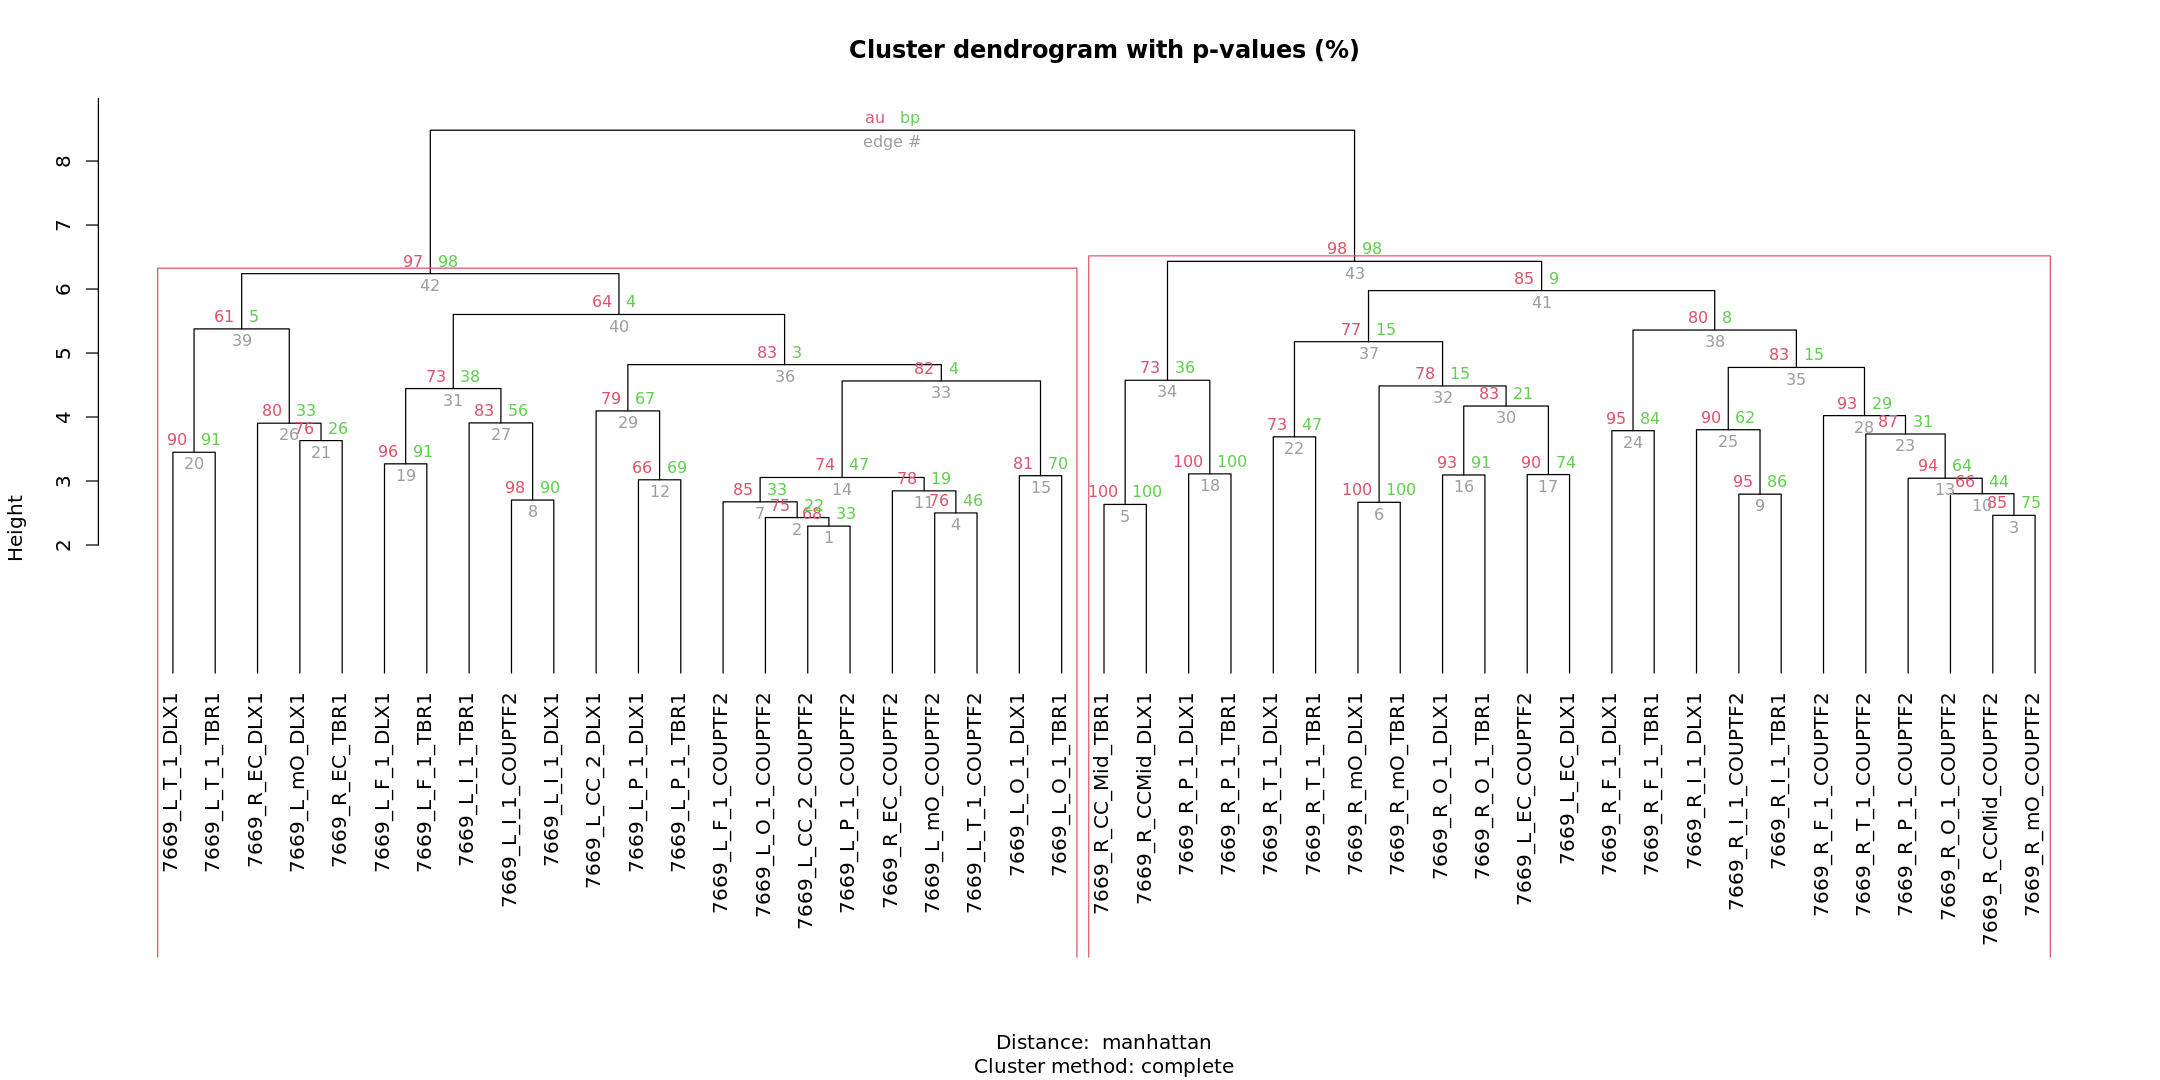

In [24]:
options(repr.plot.width=18, repr.plot.height=9)
plot(res.pv, hang = -1)
pvrect(res.pv)

In [25]:
pdf(file="7669_varXsample_CTX_sorted_heatmap_bootstrap.pdf",height=9,width=18)
plot(res.pv, hang = -1)
pvrect(res.pv)
dev.off() 

png 
  2

In [17]:
myCol<-as.data.frame(t(na.omit(t(casted_MAF_VarBySample2[,1:4]))))
myCol$Hemisphere_col[myCol$Hemisphere %in% c("R")]<-"Red"
myCol$Hemisphere_col[myCol$Hemisphere %in% c("L")]<-"Blue"
myCol$Region_col[myCol$Region %in% c("EC")]<-"#F0A0FF"
myCol$Region_col[myCol$Region %in% c("F")]<-"#0075DC"
myCol$Region_col[myCol$Region %in% c("I")]<-"#993F00"
myCol$Region_col[myCol$Region %in% c("mO")]<-"#4C005C"
myCol$Region_col[myCol$Region %in% c("O")]<-"#FF5005"
myCol$Region_col[myCol$Region %in% c("P")]<-"#FFE100"
myCol$Region_col[myCol$Region %in% c("T")]<-"#2BCE48"
myCol$Region_col[myCol$Region %in% c("CC")]<-"#808080"

myCol$Cell_Type[myCol$Cell_Type %in% c("DLX1")]<-"#F06666"
myCol$Cell_Type[myCol$Cell_Type %in% c("COUPTF2")]<-"#5FBEEB"
myCol$Cell_Type[myCol$Cell_Type %in% c("TBR1")]<-"#7BBE42"
myCol2<-as.matrix(cbind(myCol$Hemisphere_col,myCol$Cell_Type,myCol$Region_col))
colnames(myCol2)<-c("Hemisphere","Cell_Type","Region")

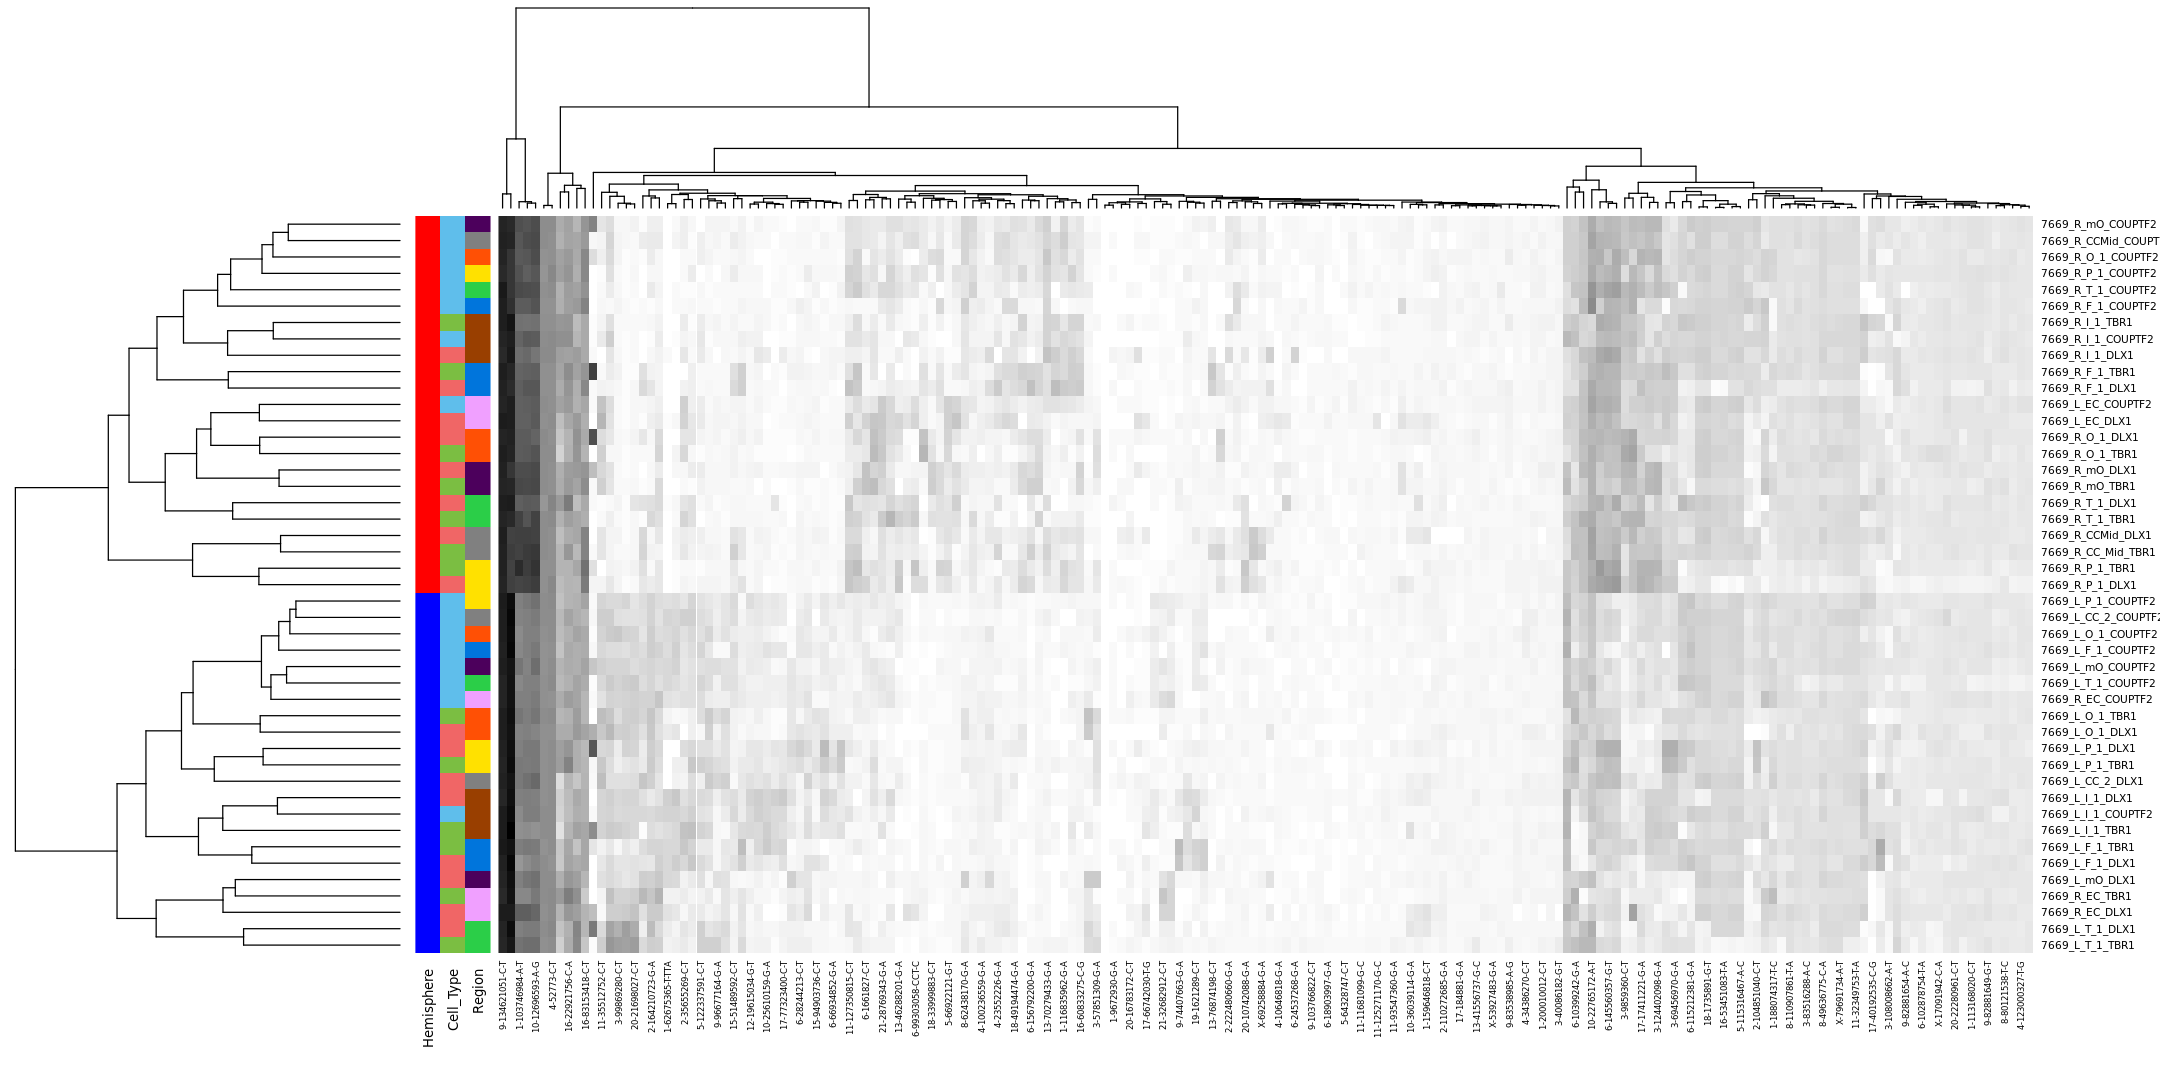

In [18]:
options(repr.plot.width=18, repr.plot.height=9)
# Colors = c("blue4","white","red4")
Colors = c("white","black")
Colors = colorRampPalette(Colors)(100)
heatmap.plus(Normalized_casted_MAF_VarBySample2,
             distfun = function(x) dist(x,method = 'manhattan'),
             col=Colors, 
             RowSideColors=myCol2,
             margins=c(8,8),
             scale = c("none"))

In [41]:
pdf(file="7669_varXsample_CTX_sorted_heatmap_scalebar.pdf",height=27,width=54)

options(repr.plot.width=18, repr.plot.height=9)
# Colors = c("blue4","white","red4")
Colors = c("white","black")
Colors = colorRampPalette(Colors)(100)
heatmap.plus(Normalized_casted_MAF_VarBySample2,
             distfun = function(x) dist(x,method = 'manhattan'),
             col=Colors, 
             RowSideColors=myCol2,
             margins=c(8,8),
             scale = c("none"))

dev.off()               

png 
  2

In [10]:
pdf(file="7669_varXsample_CTX_sorted_heatmap.pdf",height=18,width=36)
# Colors = c("blue4","white","red4")
Colors = c("white","black")
Colors = colorRampPalette(Colors)(100)
heatmap.plus(Normalized_casted_MAF_VarBySample2,
             distfun = function(x) dist(x,method = 'manhattan'),
             col=Colors, 
             RowSideColors=myCol2,
             margins=c(8,8),
             scale = c("none"))
dev.off()        

png 
  2

# pvalue for hierarchical clustering

# 7669 bulk left hemisphere CTX BG HIP relationship var x sample heatmap

In [25]:
melt_mtcars<-shared_mosaic_filtered[,c("ID", "CHROM.POS.REF.ALT", "MAF","Punch", "Hemisphere", "Organ", "Region",  "Cell_Type", "CTX_BG_HIP_relationship")]
melt_mtcars<-melt_mtcars[melt_mtcars$CTX_BG_HIP_relationship==1,]
#melt_mtcars<-na.omit(melt_mtcars)
#melt_mtcars<-na.omit(melt_mtcars[melt_mtcars$CHROM.POS.REF.ALT %in% variant_list[variant_list$sample_number_presented>1,]$variant_list,])

#melt_mtcars<-melt_mtcars[melt_mtcars$CTX_BG_HIP_relationship %in% c('1'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('DLX1','TBR1','COUPTF2'),]
melt_mtcars<-melt_mtcars[(melt_mtcars$Organ %in% c('CTX','BG','HIP')),]
melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('TBR1','DLX1'),]

#melt_mtcars<-melt_mtcars[(melt_mtcars$Organ %in% c('CTX','BG','AMG','HIP','THAL','SUB','CLO')),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Region %in% c('P','T','O','Ins','F'),]
melt_mtcars<-melt_mtcars[melt_mtcars$Hemisphere %in% c('R'),]
melt_mtcars<-melt_mtcars[!(melt_mtcars$Punch %in% c(2:17) & melt_mtcars$Region %in% c('P','O')),]

melt_mtcars$MAF <- sqrt(melt_mtcars$MAF)

In [26]:
casted_MAF_VarBySample <- dcast(melt_mtcars, ID+Hemisphere+Region+Organ+Cell_Type~CHROM.POS.REF.ALT, value.var = "MAF", rm.na=T)
rownames(casted_MAF_VarBySample) <- casted_MAF_VarBySample$ID
casted_MAF_VarBySample2 <- casted_MAF_VarBySample[,-1]
nrow(casted_MAF_VarBySample2)
unique(casted_MAF_VarBySample2$Hemisphere)
unique(casted_MAF_VarBySample2$Organ)
unique(casted_MAF_VarBySample2$Region)
unique(casted_MAF_VarBySample2$Cell_Type)

[1] 12

[1] "R"

[1] "BG"  "CTX" "HIP"

[1] "Cau" "Put" "F"   "I"   "mO"  "O"   "P"   "GP"  "Hip" "T"

[1] "DLX1" "TBR1"

In [27]:
Normalized_casted_MAF_VarBySample2<-t(na.omit(t(casted_MAF_VarBySample2[,-1:-4])))
label<-t(na.omit(t(casted_MAF_VarBySample2[,1:4])))
label<-as.data.frame(label)

Bootstrap (r = 0.5)... Done.
Bootstrap (r = 0.6)... Done.
Bootstrap (r = 0.7)... Done.
Bootstrap (r = 0.8)... Done.
Bootstrap (r = 0.9)... Done.
Bootstrap (r = 1.0)... Done.
Bootstrap (r = 1.1)... Done.
Bootstrap (r = 1.2)... Done.
Bootstrap (r = 1.3)... Done.
Bootstrap (r = 1.4)... Done.


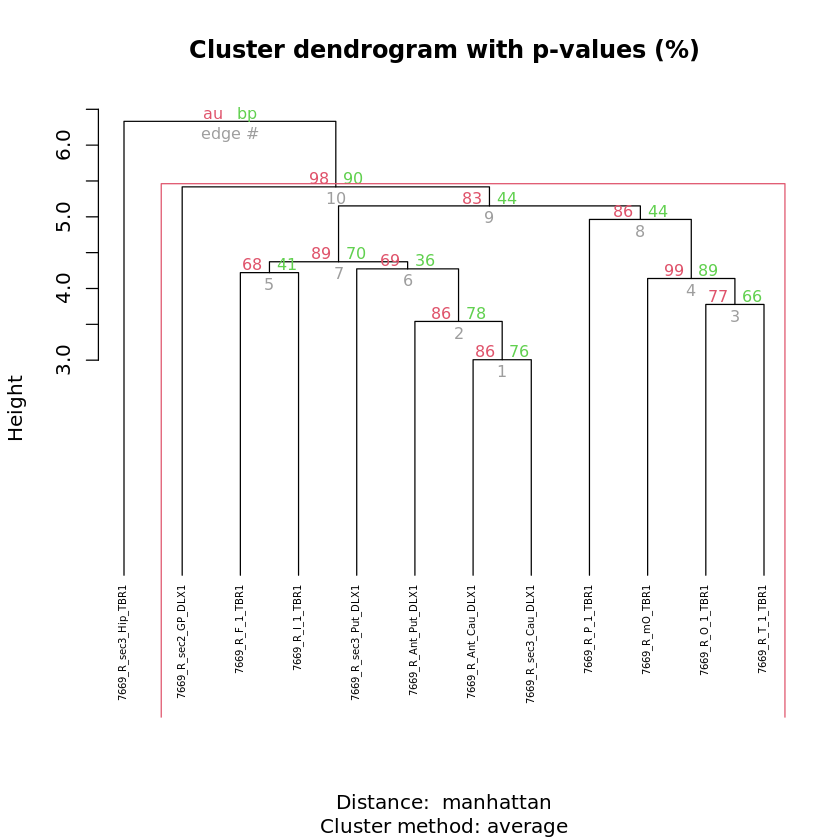

In [29]:
set.seed(123)
res.pv <- pvclust(t(Normalized_casted_MAF_VarBySample2), method.dist="manhattan", 
                  method.hclust="average", nboot = 1000)
plot(res.pv, hang = -1, cex = 0.5)
pvrect(res.pv)

In [28]:
left_right_cell_col_ann <- HeatmapAnnotation(simple_anno_size = unit(0.5, "cm"), 
                                             which = "row",
                                             #Hemisphere = label$Hemisphere,
                                             Organ = label$Organ,
                                             Region = label$Region,
                                             Cell_Type = label$Cell_Type,
                                             #Cell_Type = label$Cell_Type,
                                             col = list(Organ = c("BG"="#CBDF00","CTX"="#00DF3D","HIP"="#9200DF"),
                                                       Region = c("Cau"="#A49A00",
                                                                  "GP"="#8EA400",
                                                                  "Put"="#75A400",
                                                                  "Hip"="#7E00A4",
                                                                  # "CA1"="#9000A4",
                                                                  # "CA3"="#A4009C",
                                                                  # "DG"="#A4007E",
                                                                   "I"="#28A400",
                                                                  "F"="#14A400",
                                                                  "O"="#00A40F",
                                                                  "P"="#00A437",
                                                                  "CC" = "#72A400",
                                                                  "EC"="#4FA400",
                                                                  "T"="#00A48B",
                                                                 "mO"="#00A49C"),
                                                       Cell_Type = c("DLX1" = "#EF6666", "TBR1" = "#7CBD42"))
                                             )

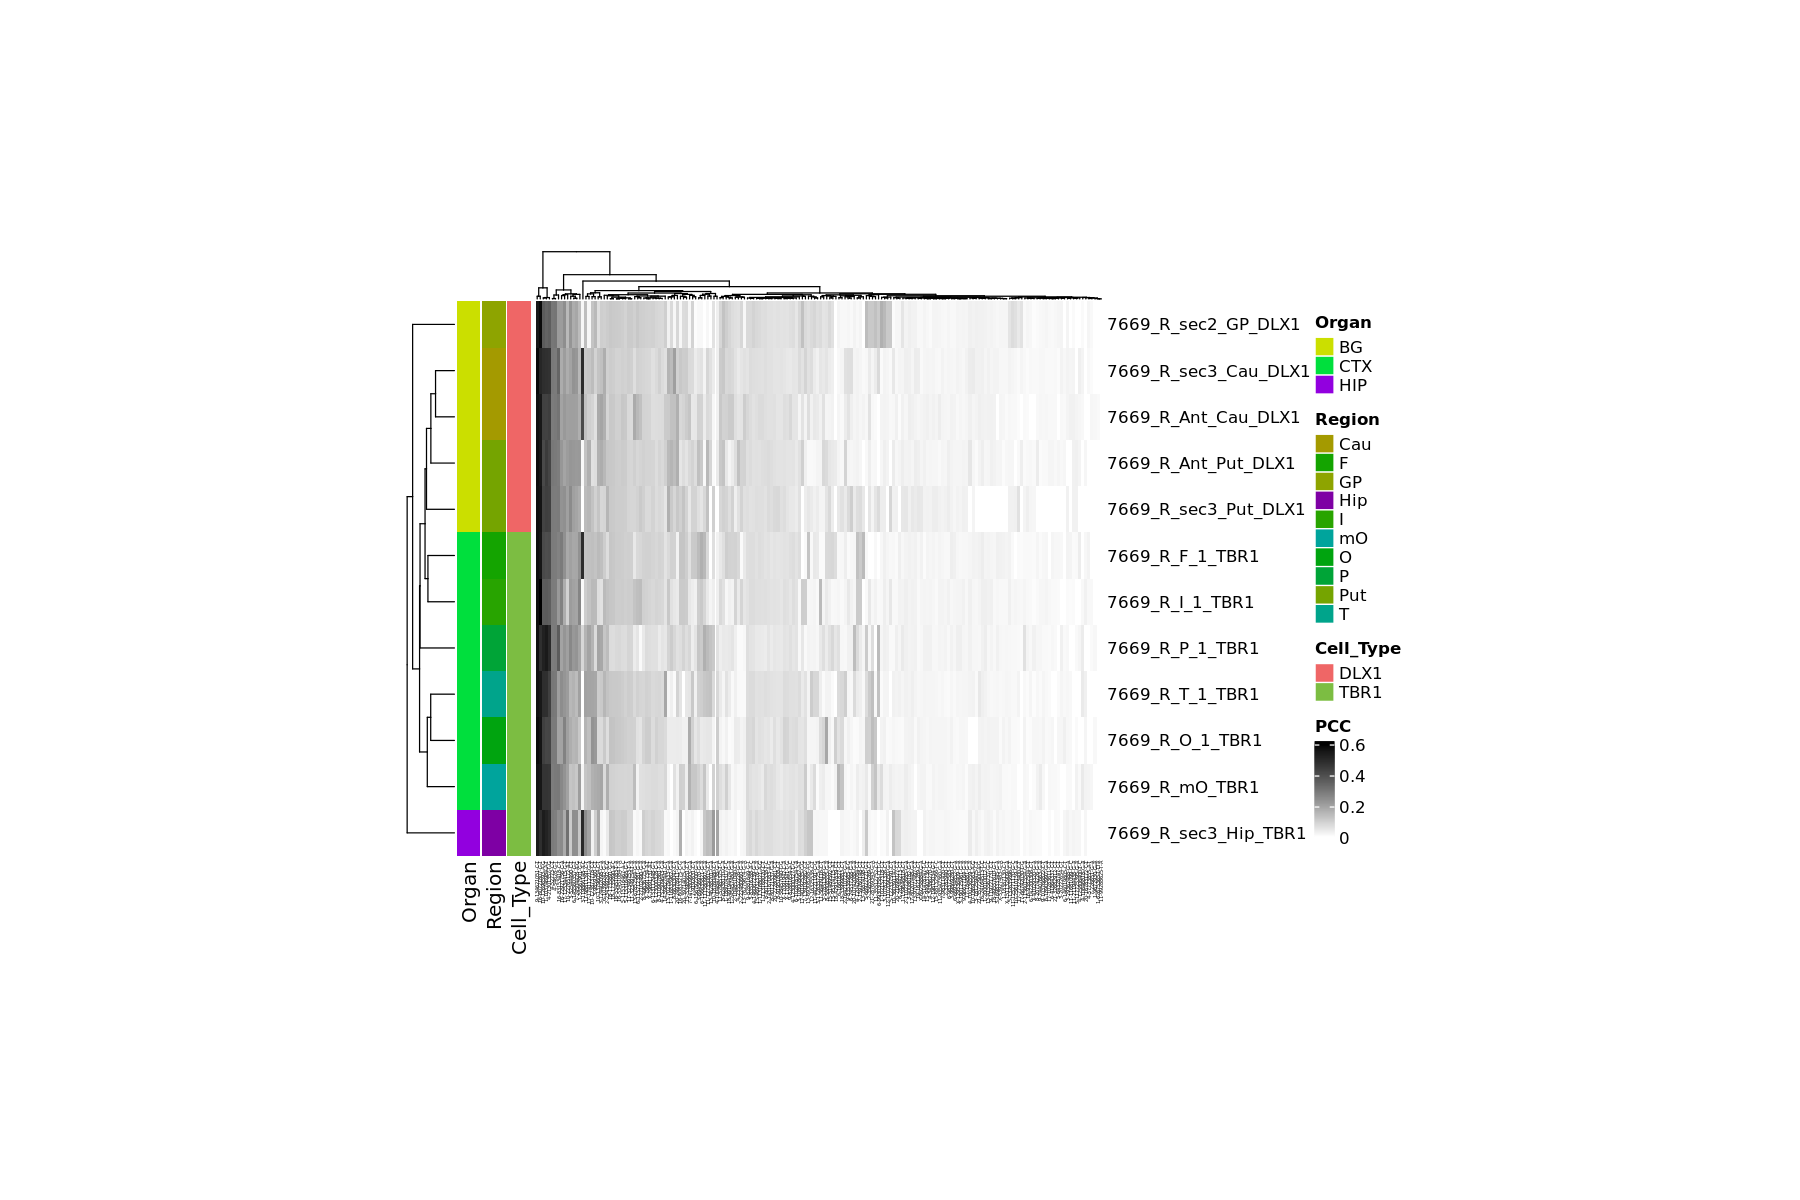

In [40]:
options(repr.plot.width = 15, repr.plot.height = 10)
p<-Heatmap(Normalized_casted_MAF_VarBySample2,
        col = c("white", "black"),
        row_names_gp = gpar(fontsize = "10"), column_names_gp = gpar(fontsize = "3"),
        name = "PCC",
        left_annotation = left_right_cell_col_ann,
        clustering_method_rows = "complete", clustering_method_columns = "complete", 
        clustering_distance_rows = "manhattan", clustering_distance_columns = "manhattan",
        cluster_rows = TRUE, cluster_columns = TRUE,
        width = unit(12, "cm"),
        heatmap_height = unit(14, "cm")) 
p

In [26]:
pdf(file="7669_varXsample_CTXtbr1_BGdlx1_HIPtbr1.pdf",height=24,width=40)
p
dev.off()   

png 
  2

# Bioskryb matched?

In [27]:
variant_anno<-read.csv(file="../variant_annotation/780_variant_annotation_by_all_samples.csv",header=T)

In [28]:
bioskryb_shared_mosaic_filtered<-subset(shared_mosaic_filtered, CHROM.POS.REF.ALT %in% variant_anno[variant_anno$R==1,]$variant_list)

In [29]:
melt_mtcars<-bioskryb_shared_mosaic_filtered[,c("ID", "CHROM.POS.REF.ALT", "MAF","Punch", "Hemisphere", "Organ", "Region",  "Cell_Type", "CTX_BG_HIP_relationship")]
#melt_mtcars<-melt_mtcars[melt_mtcars$CTX_BG_HIP_relationship==1,]
#melt_mtcars<-na.omit(melt_mtcars)
#melt_mtcars<-na.omit(melt_mtcars[melt_mtcars$CHROM.POS.REF.ALT %in% variant_list[variant_list$sample_number_presented>1,]$variant_list,])

#melt_mtcars<-melt_mtcars[melt_mtcars$CTX_BG_HIP_relationship %in% c('1'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('DLX1','TBR1','COUPTF2'),]
melt_mtcars<-melt_mtcars[(melt_mtcars$Region %in% c('F','T','Hip')),]
melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('TBR1','DLX1'),]

#melt_mtcars<-melt_mtcars[(melt_mtcars$Organ %in% c('CTX','BG','AMG','HIP','THAL','SUB','CLO')),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Region %in% c('P','T','O','Ins','F'),]
melt_mtcars<-melt_mtcars[melt_mtcars$Hemisphere %in% c('R'),]
melt_mtcars$MAF <- sqrt(melt_mtcars$MAF)

In [30]:
casted_MAF_VarBySample <- dcast(melt_mtcars, ID+Hemisphere+Region+Organ+Cell_Type~CHROM.POS.REF.ALT, value.var = "MAF", rm.na=T)
rownames(casted_MAF_VarBySample) <- casted_MAF_VarBySample$ID
casted_MAF_VarBySample2 <- casted_MAF_VarBySample[,-1]
nrow(casted_MAF_VarBySample2)
unique(casted_MAF_VarBySample2$Hemisphere)
unique(casted_MAF_VarBySample2$Organ)
unique(casted_MAF_VarBySample2$Region)
unique(casted_MAF_VarBySample2$Cell_Type)

[1] 6

[1] "R"

[1] "CTX" "HIP"

[1] "F"   "Hip" "T"

[1] "DLX1" "TBR1"

In [31]:
Normalized_casted_MAF_VarBySample2<-t(na.omit(t(casted_MAF_VarBySample2[,-1:-4])))
label<-t(na.omit(t(casted_MAF_VarBySample2[,1:4])))
label<-as.data.frame(label)

In [32]:
left_right_cell_col_ann <- HeatmapAnnotation(simple_anno_size = unit(0.5, "cm"), 
                                             which = "row",
                                             #Hemisphere = label$Hemisphere,
                                             Organ = label$Organ,
                                             Region = label$Region,
                                             Cell_Type = label$Cell_Type,
                                             #Cell_Type = label$Cell_Type,
                                             col = list(Organ = c("BG"="#CBDF00","CTX"="#00DF3D","HIP"="#9200DF"),
                                                       Region = c("Cau"="#A49A00",
                                                                  "GP"="#8EA400",
                                                                  "Put"="#75A400",
                                                                  "Hip"="#7E00A4",
                                                                  # "CA1"="#9000A4",
                                                                  # "CA3"="#A4009C",
                                                                  # "DG"="#A4007E",
                                                                   "I"="#28A400",
                                                                  "F"="#14A400",
                                                                  "O"="#00A40F",
                                                                  "P"="#00A437",
                                                                  "CC" = "#72A400",
                                                                  "EC"="#4FA400",
                                                                  "T"="#00A48B",
                                                                 "mO"="#00A49C"),
                                                       Cell_Type = c("DLX1" = "#EF6666", "TBR1" = "#7CBD42","COUPTF2"="#5FBEEB"))
                                             )

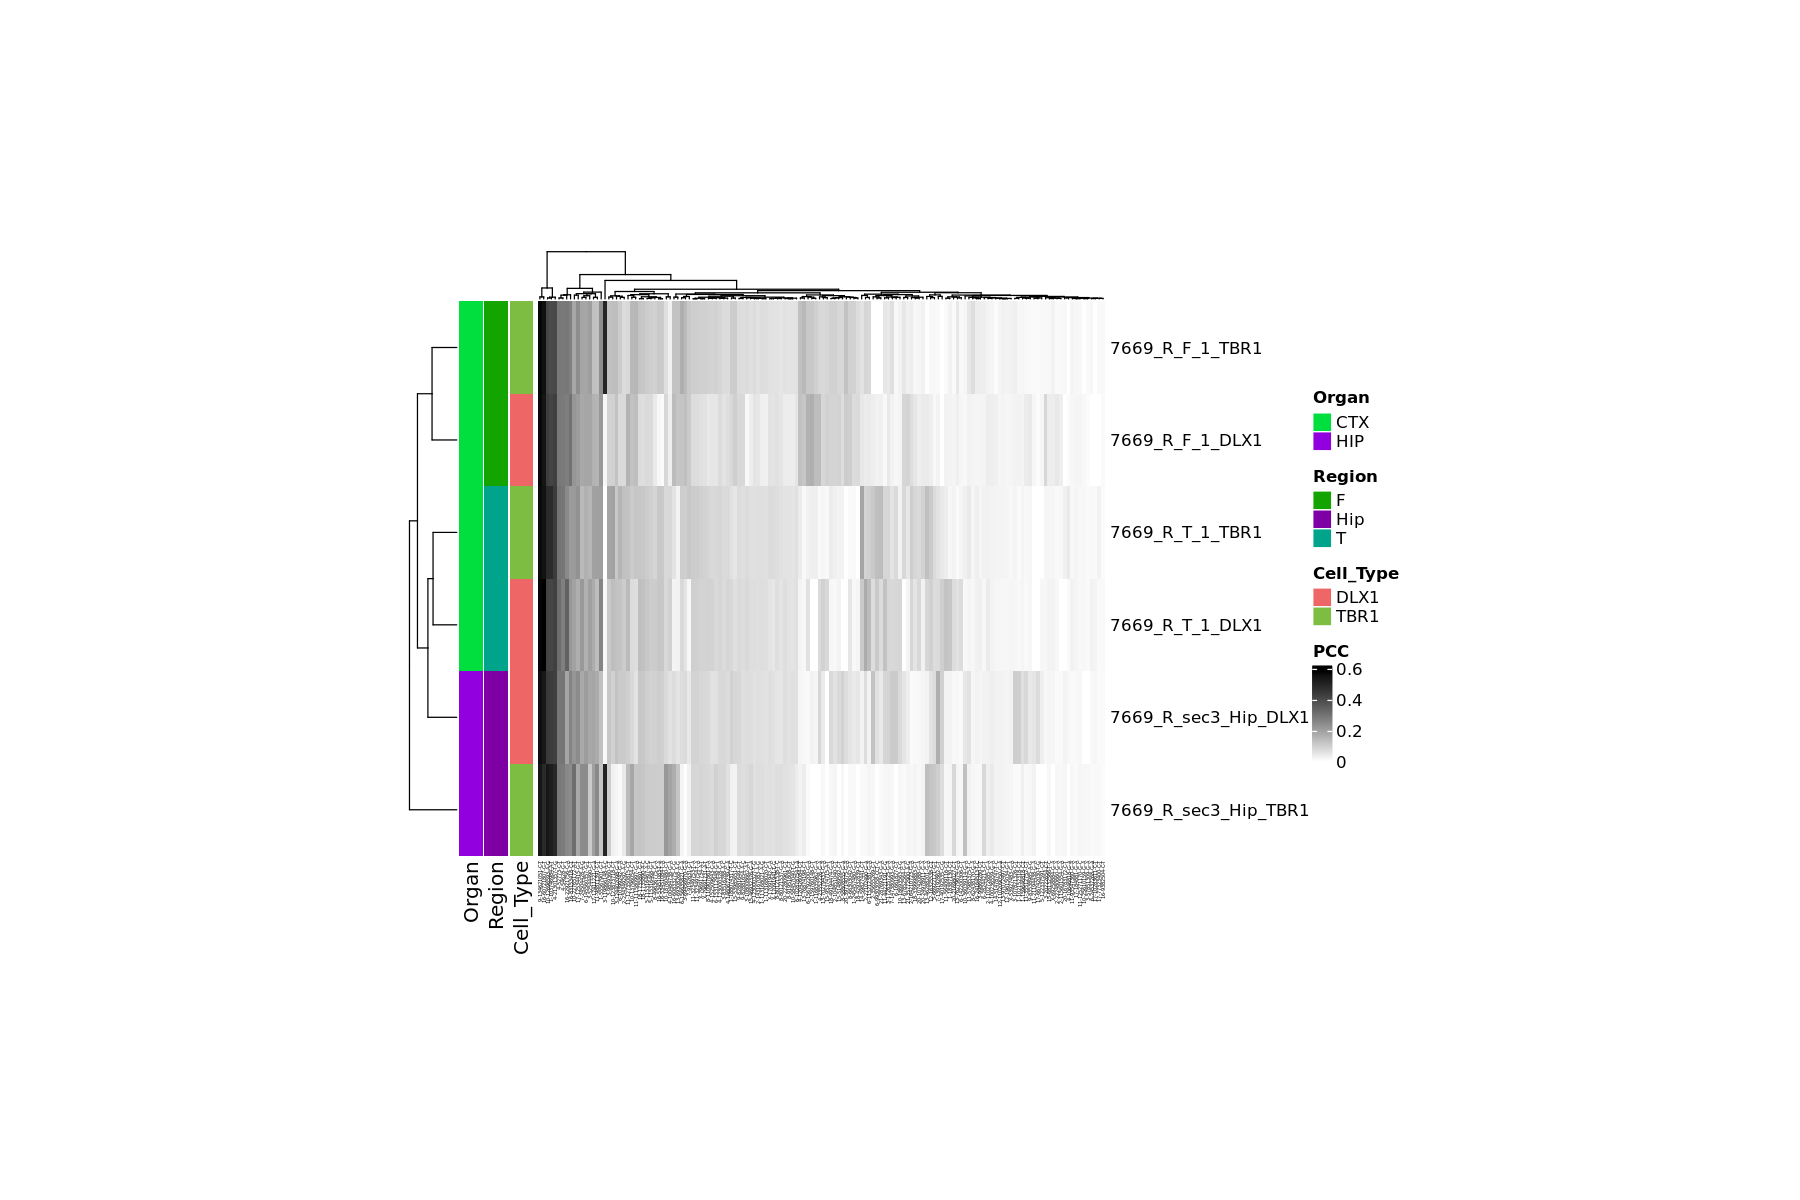

In [33]:
options(repr.plot.width = 15, repr.plot.height = 10)
p<-Heatmap(Normalized_casted_MAF_VarBySample2,
        col = c("white", "black"),
        row_names_gp = gpar(fontsize = "10"), column_names_gp = gpar(fontsize = "3"),
        name = "PCC",
        left_annotation = left_right_cell_col_ann,
        clustering_method_rows = "complete", clustering_method_columns = "complete", 
        clustering_distance_rows = "manhattan", clustering_distance_columns = "manhattan",
        cluster_rows = TRUE, cluster_columns = TRUE,
        width = unit(12, "cm"),
        heatmap_height = unit(14, "cm")) 
p